## Predictive Modeling of In Hospital Mortality Followed by Elective Surgery

In [1]:
#Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer, KNNImputer
from scipy.stats import zscore

In [2]:
pd.read_csv(r"D:\Assignment\Assignment\Capstone-Project-Final\Dataset\Hospital inmoratlity.csv")

,Facility ID,Facility Name,Address,City/Town,State,ZIP Code,County/Parish,Telephone Number,Measure ID,Measure Name,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Start Date,End Date
0,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,COMP_HIP_KNEE,Rate of complications for hip/knee replacement...,No Different Than the National Rate,32,3,1.6,5.5,NaN,07/01/2020,03/31/2023
1,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,MORT_30_AMI,Death rate for heart attack patients,No Different Than the National Rate,291,10.8,8.4,13.6,NaN,07/01/2020,06/30/2023
2,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,MORT_30_CABG,Death rate for CABG surgery patients,No Different Than the National Rate,157,3.8,2.1,6.8,NaN,07/01/2020,06/30/2023
3,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,MORT_30_COPD,Death rate for COPD patients,No Different Than the National Rate,122,7.9,5.2,11.9,NaN,07/01/2020,06/30/2023
4,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,MORT_30_HF,Death rate for heart failure patients,No Different Than the National Rate,610,10.5,8.6,12.9,NaN,07/01/2020,06/30/2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90796,671301,HEMPHILL COUNTY HOSPITAL,1020 S 4TH ST,CANADIAN,TX,79014,HEMPHILL,(806) 323-6622,PSI_12,Perioperative pulmonary embolism or deep vein ...,Not Available,Not Available,Not Available,Not Available,Not Available,5,07/01/2021,06/30/2023
90797,671301,HEMPHILL COUNTY HOSPITAL,1020 S 4TH ST,CANADIAN,TX,79014,HEMPHILL,(806) 323-6622,PSI_13,Postoperative sepsis rate,Not Available,Not Available,Not Available,Not Available,Not Available,5,07/01/2021,06/30/2023
90798,671301,HEMPHILL COUNTY HOSPITAL,1020 S 4TH ST,CANADIAN,TX,79014,HEMPHILL,(806) 323-6622,PSI_14,Postoperative wound dehiscence rate,Not Available,Not Available,Not Available,Not Available,Not Available,5,07/01/2021,06/30/2023
90799,671301,HEMPHILL COUNTY HOSPITAL,1020 S 4TH ST,CANADIAN,TX,79014,HEMPHILL,(806) 323-6622,PSI_15,Abdominopelvic accidental puncture or lacerati...,Not Available,Not Available,Not Available,Not Available,Not Available,5,07/01/2021,06/30/2023


In [2]:
#loading the dataset
data = pd.read_csv('/content/Complications_and_Deaths-Hospital.csv')
data.head()

,Facility ID,Facility Name,Address,City/Town,State,ZIP Code,County/Parish,Telephone Number,Measure ID,Measure Name,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Start Date,End Date
0,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,COMP_HIP_KNEE,Rate of complications for hip/knee replacement...,No Different Than the National Rate,32,3,1.6,5.5,NaN,07-01-2020,03/31/2023
1,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,MORT_30_AMI,Death rate for heart attack patients,No Different Than the National Rate,291,10.8,8.4,13.6,NaN,07-01-2020,06/30/2023
2,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,MORT_30_CABG,Death rate for CABG surgery patients,No Different Than the National Rate,157,3.8,2.1,6.8,NaN,07-01-2020,06/30/2023
3,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,MORT_30_COPD,Death rate for COPD patients,No Different Than the National Rate,122,7.9,5.2,11.9,NaN,07-01-2020,06/30/2023
4,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,MORT_30_HF,Death rate for heart failure patients,No Different Than the National Rate,610,10.5,8.6,12.9,NaN,07-01-2020,06/30/2023


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90801 entries, 0 to 90800
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Facility ID           90801 non-null  object
 1   Facility Name         90801 non-null  object
 2   Address               90801 non-null  object
 3   City/Town             90801 non-null  object
 4   State                 90801 non-null  object
 5   ZIP Code              90801 non-null  int64 
 6   County/Parish         90801 non-null  object
 7   Telephone Number      90801 non-null  object
 8   Measure ID            90801 non-null  object
 9   Measure Name          90801 non-null  object
 10  Compared to National  90801 non-null  object
 11  Denominator           90801 non-null  object
 12  Score                 90801 non-null  object
 13  Lower Estimate        90801 non-null  object
 14  Higher Estimate       90801 non-null  object
 15  Footnote              42363 non-null

In [4]:
data.describe()

,ZIP Code
count,90801.000000
mean,54069.101904
std,27003.184740
min,603.000000
25%,32955.000000
50%,55417.000000
75%,76208.000000
max,99929.000000


In [5]:
#checking for null values
data.isnull().sum()

,0
Facility ID,0
Facility Name,0
Address,0
City/Town,0
State,0
ZIP Code,0
County/Parish,0
Telephone Number,0
Measure ID,0
Measure Name,0


In [6]:
#checking for duplicates
data.duplicated().sum()

0

In [7]:
data = data.convert_dtypes()
# Convert columns to float or int
columns_to_convert = ['Facility ID', 'Denominator', 'Score', 'Lower Estimate', 'Footnote', 'Higher Estimate']
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce')
data['Start Date'] = pd.to_datetime(data['Start Date'], errors='coerce')
data['End Date'] = pd.to_datetime(data['End Date'], errors='coerce')

# Duration of the measure in days
data['Measure Duration'] = (data['End Date'] - data['Start Date']).dt.days
#print(data[['Start Date', 'End Date', 'Measure Duration']].head())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90801 entries, 0 to 90800
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Facility ID           87685 non-null  Int64         
 1   Facility Name         90801 non-null  string        
 2   Address               90801 non-null  string        
 3   City/Town             90801 non-null  string        
 4   State                 90801 non-null  string        
 5   ZIP Code              90801 non-null  Int64         
 6   County/Parish         90801 non-null  string        
 7   Telephone Number      90801 non-null  string        
 8   Measure ID            90801 non-null  string        
 9   Measure Name          90801 non-null  string        
 10  Compared to National  90801 non-null  string        
 11  Denominator           45970 non-null  Int64         
 12  Score                 48934 non-null  Float64       
 13  Lower Estimate  


 - ZIP Should be considered as a Strig as it is acadtegorical variable

In [8]:
# Outlier Detection: Removing Outliers
def remove_outliers(df, columns, threshold=3):
    for col in columns:
        df = df[np.abs(zscore(df[col])) < threshold]
    return df


Facility Name
MEMORIAL HOSPITAL                  228
COMMUNITY MEMORIAL HOSPITAL        114
ST MARY MEDICAL CENTER              76
COMMUNITY HOSPITAL                  76
SHRINERS HOSPITALS FOR CHILDREN     76
HOLY CROSS HOSPITAL                 76
ST JOSEPH MEDICAL CENTER            76
MERCY MEDICAL CENTER                76
GOOD SAMARITAN HOSPITAL             76
ST MARY'S MEDICAL CENTER            76
ST LUKES HOSPITAL                   76
MEMORIAL MEDICAL CENTER             76
WASHINGTON COUNTY HOSPITAL          57
MERCY REGIONAL MEDICAL CENTER       57
DOCTORS HOSPITAL                    57
Name: count, dtype: Int64


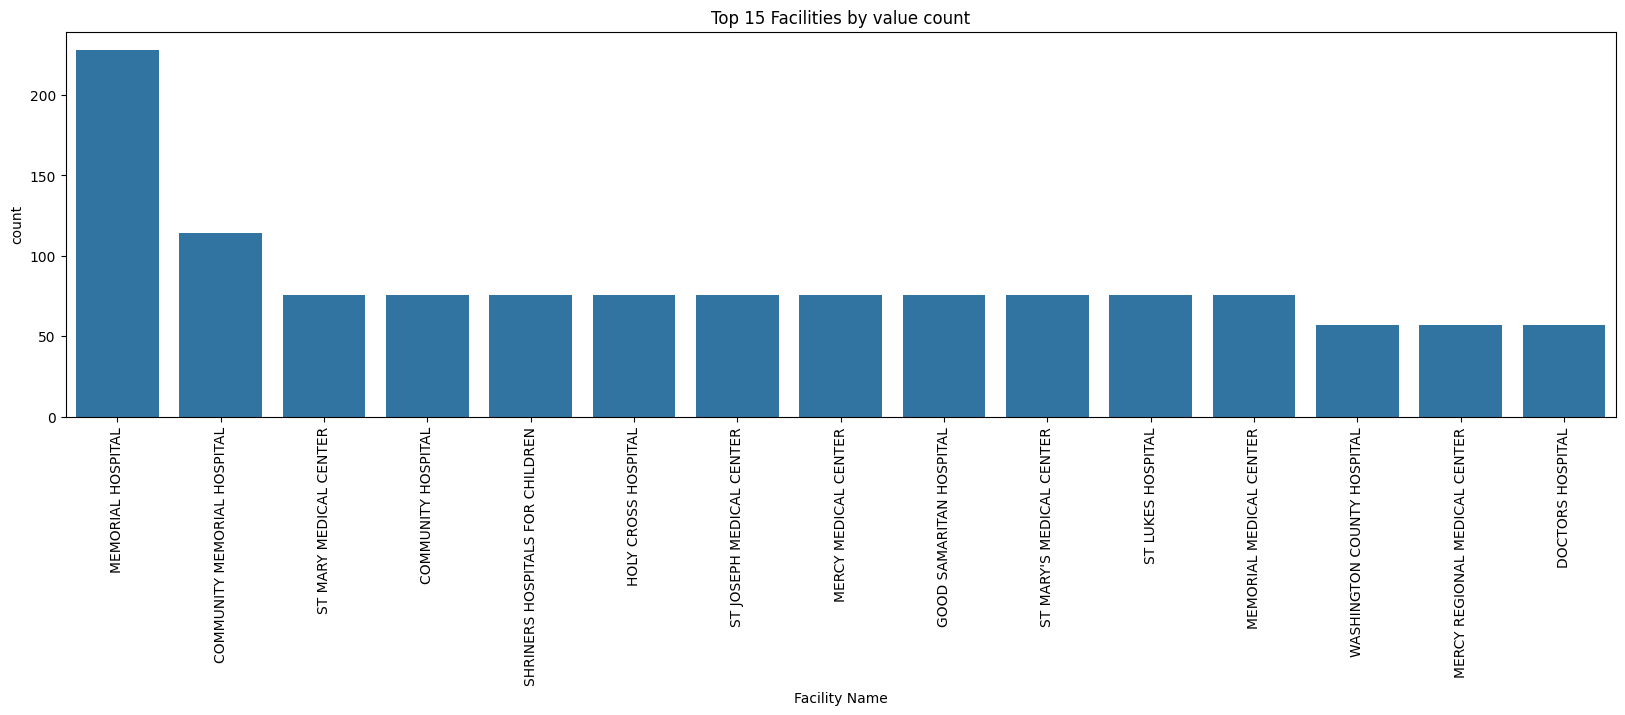

In [9]:
top_facilities = data['Facility Name'].value_counts().nlargest(15)
print(top_facilities)


plt.figure(figsize=(20, 5))
sns.barplot(x=top_facilities.index, y=top_facilities)
plt.title('Top 15 Facilities by value count')
plt.xticks(rotation=90)
plt.show()

State
TX    7505
CA    6460
FL    3629
IL    3363
OH    3116
NY    3097
PA    3097
GA    2546
MI    2527
KS    2470
Name: count, dtype: Int64


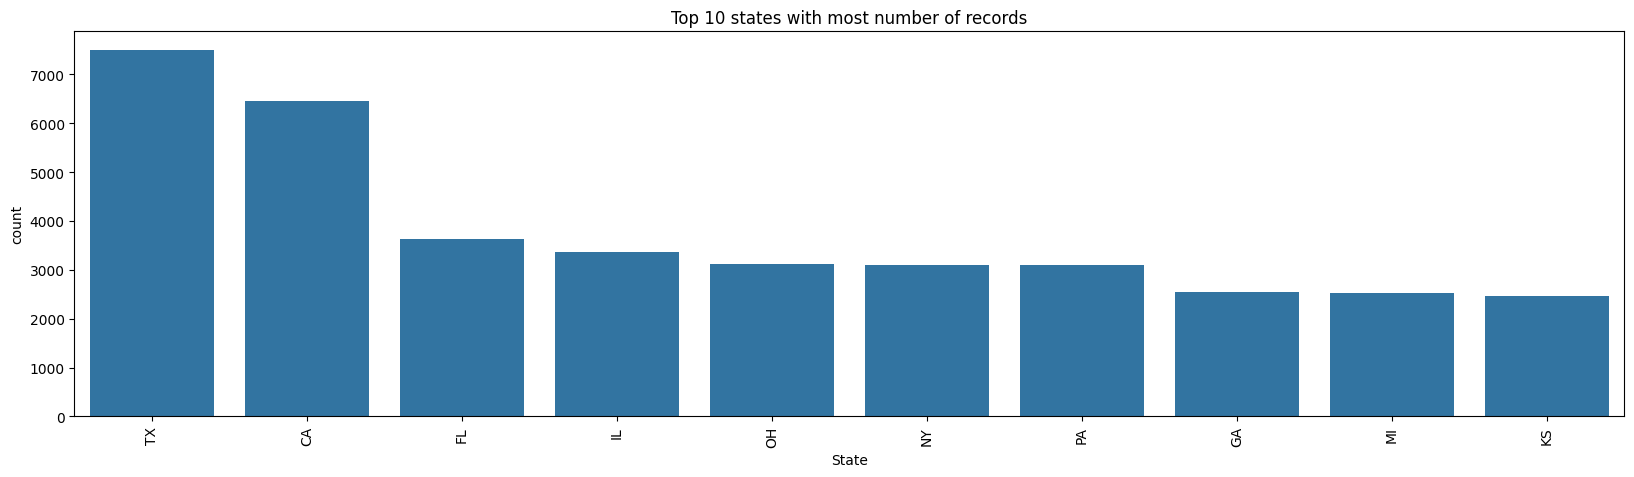

In [10]:
top_states = data['State'].value_counts().nlargest(10)
print(top_states)


plt.figure(figsize=(20, 5))
sns.barplot(x=top_states.index, y=top_states)
plt.title('Top 10 states with most number of records')
plt.xticks(rotation=90)
plt.show()

<ipython-input-11-087327d92101>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='viridis')


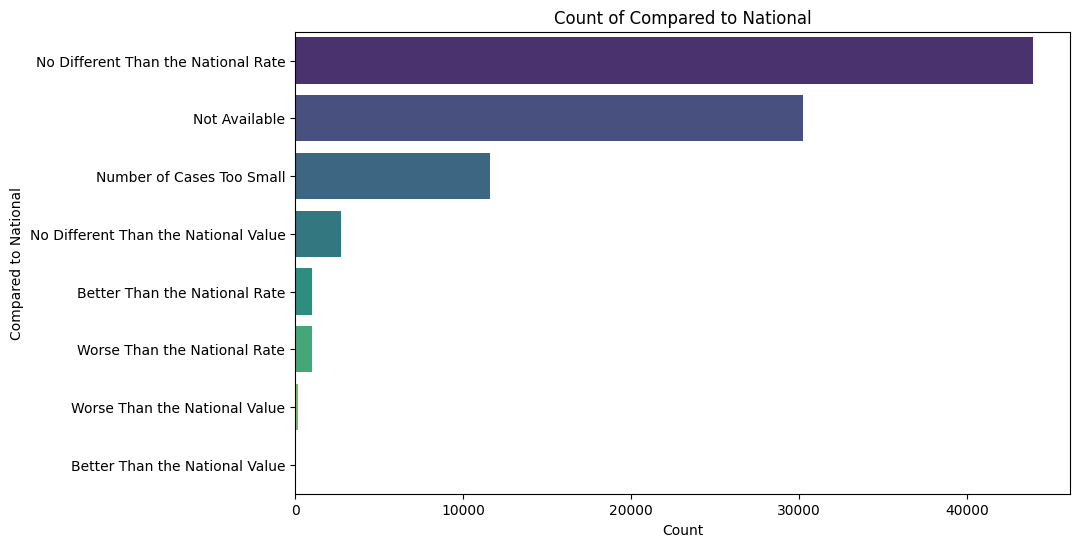

In [11]:
# Analyzing categorical data
categorical_columns = ['Compared to National']
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='viridis')
    plt.title(f'Count of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()


In [12]:
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
Facility ID              3116
Facility Name               0
Address                     0
City/Town                   0
State                       0
ZIP Code                    0
County/Parish               0
Telephone Number            0
Measure ID                  0
Measure Name                0
Compared to National        0
Denominator             44831
Score                   41867
Lower Estimate          41867
Higher Estimate         41867
Footnote                48495
Start Date                  0
End Date                    0
Measure Duration            0
dtype: int64



### Data Preprocessing
#### Imputation of Missing Values
##### The dataset contains missing values in the following columns:
    - Denominator
    - Score
    - Lower Estimate
    - Higher Estimate
    - Footnote
#### Plan for Imputation:
    1. For numerical columns (Denominator, Score, Lower Estimate, Higher Estimate):
            Use mean, median, or mode for imputation based on the distribution.
            Alternatively, use KNN imputation or regression-based methods if needed.
    2. For the categorical column (Footnote):
            Use mode or forward/backward fill (if categorical continuity exists).
            For complex cases, treat missing values as a separate category.


In [13]:
data

,Facility ID,Facility Name,Address,City/Town,State,ZIP Code,County/Parish,Telephone Number,Measure ID,Measure Name,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Start Date,End Date,Measure Duration
0,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,COMP_HIP_KNEE,Rate of complications for hip/knee replacement...,No Different Than the National Rate,32,3.0,1.6,5.5,<NA>,2020-07-01,2023-03-31,1003
1,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,MORT_30_AMI,Death rate for heart attack patients,No Different Than the National Rate,291,10.8,8.4,13.6,<NA>,2020-07-01,2023-06-30,1094
2,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,MORT_30_CABG,Death rate for CABG surgery patients,No Different Than the National Rate,157,3.8,2.1,6.8,<NA>,2020-07-01,2023-06-30,1094
3,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,MORT_30_COPD,Death rate for COPD patients,No Different Than the National Rate,122,7.9,5.2,11.9,<NA>,2020-07-01,2023-06-30,1094
4,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,MORT_30_HF,Death rate for heart failure patients,No Different Than the National Rate,610,10.5,8.6,12.9,<NA>,2020-07-01,2023-06-30,1094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90796,671301,HEMPHILL COUNTY HOSPITAL,1020 S 4TH ST,CANADIAN,TX,79014,HEMPHILL,(806) 323-6622,PSI_12,Perioperative pulmonary embolism or deep vein ...,Not Available,<NA>,<NA>,<NA>,<NA>,5,2021-07-01,2023-06-30,729
90797,671301,HEMPHILL COUNTY HOSPITAL,1020 S 4TH ST,CANADIAN,TX,79014,HEMPHILL,(806) 323-6622,PSI_13,Postoperative sepsis rate,Not Available,<NA>,<NA>,<NA>,<NA>,5,2021-07-01,2023-06-30,729
90798,671301,HEMPHILL COUNTY HOSPITAL,1020 S 4TH ST,CANADIAN,TX,79014,HEMPHILL,(806) 323-6622,PSI_14,Postoperative wound dehiscence rate,Not Available,<NA>,<NA>,<NA>,<NA>,5,2021-07-01,2023-06-30,729
90799,671301,HEMPHILL COUNTY HOSPITAL,1020 S 4TH ST,CANADIAN,TX,79014,HEMPHILL,(806) 323-6622,PSI_15,Abdominopelvic accidental puncture or lacerati...,Not Available,<NA>,<NA>,<NA>,<NA>,5,2021-07-01,2023-06-30,729


In [14]:
data['Footnote'].value_counts()

,count
Footnote,
13,16332
1,12491
5,8718
19,2508
7,1761
28,480
23,16


In [15]:
# Categorical column imputation (mode strategy)
# Replace pd.NA with np.nan
data['Footnote'] = data['Footnote'].replace({pd.NA: np.nan})

In [16]:
# Numerical columns imputation (mean strategy)
num_imputer = SimpleImputer(strategy='mean')
data[['Denominator', 'Score', 'Lower Estimate', 'Higher Estimate']] = num_imputer.fit_transform(
    data[['Denominator', 'Score', 'Lower Estimate', 'Higher Estimate']]
)

In [17]:
data['Footnote'].replace({pd.NA: data['Footnote'].mode()[0]},inplace=True)

<ipython-input-17-40544d915138>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Footnote'].replace({pd.NA: data['Footnote'].mode()[0]},inplace=True)


In [18]:
data# Outlier Detection: Removing Outliers
def remove_outliers(df, columns, threshold=3):
    for col in columns:
        df = df[np.abs(zscore(df[col])) < threshold]
    return df

# Drop outliers in numerical columns
outlier_columns = ['Denominator', 'Score', 'Lower Estimate', 'Higher Estimate']
data = remove_outliers(data, outlier_columns)

In [19]:
data

,Facility ID,Facility Name,Address,City/Town,State,ZIP Code,County/Parish,Telephone Number,Measure ID,Measure Name,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Start Date,End Date,Measure Duration
0,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,COMP_HIP_KNEE,Rate of complications for hip/knee replacement...,No Different Than the National Rate,32.000000,3.000000,1.600000,5.500000,13,2020-07-01,2023-03-31,1003
1,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,MORT_30_AMI,Death rate for heart attack patients,No Different Than the National Rate,291.000000,10.800000,8.400000,13.600000,13,2020-07-01,2023-06-30,1094
2,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,MORT_30_CABG,Death rate for CABG surgery patients,No Different Than the National Rate,157.000000,3.800000,2.100000,6.800000,13,2020-07-01,2023-06-30,1094
3,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,MORT_30_COPD,Death rate for COPD patients,No Different Than the National Rate,122.000000,7.900000,5.200000,11.900000,13,2020-07-01,2023-06-30,1094
4,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,MORT_30_HF,Death rate for heart failure patients,No Different Than the National Rate,610.000000,10.500000,8.600000,12.900000,13,2020-07-01,2023-06-30,1094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90796,671301,HEMPHILL COUNTY HOSPITAL,1020 S 4TH ST,CANADIAN,TX,79014,HEMPHILL,(806) 323-6622,PSI_12,Perioperative pulmonary embolism or deep vein ...,Not Available,1181.803285,11.196957,7.418498,15.374961,5,2021-07-01,2023-06-30,729
90797,671301,HEMPHILL COUNTY HOSPITAL,1020 S 4TH ST,CANADIAN,TX,79014,HEMPHILL,(806) 323-6622,PSI_13,Postoperative sepsis rate,Not Available,1181.803285,11.196957,7.418498,15.374961,5,2021-07-01,2023-06-30,729
90798,671301,HEMPHILL COUNTY HOSPITAL,1020 S 4TH ST,CANADIAN,TX,79014,HEMPHILL,(806) 323-6622,PSI_14,Postoperative wound dehiscence rate,Not Available,1181.803285,11.196957,7.418498,15.374961,5,2021-07-01,2023-06-30,729
90799,671301,HEMPHILL COUNTY HOSPITAL,1020 S 4TH ST,CANADIAN,TX,79014,HEMPHILL,(806) 323-6622,PSI_15,Abdominopelvic accidental puncture or lacerati...,Not Available,1181.803285,11.196957,7.418498,15.374961,5,2021-07-01,2023-06-30,729



# Feature Engineering

In [20]:
data.columns

Index(['Facility ID', 'Facility Name', 'Address', 'City/Town', 'State',
       'ZIP Code', 'County/Parish', 'Telephone Number', 'Measure ID',
       'Measure Name', 'Compared to National', 'Denominator', 'Score',
       'Lower Estimate', 'Higher Estimate', 'Footnote', 'Start Date',
       'End Date', 'Measure Duration'],
      dtype='object')

In [21]:
# Feature Engineering: Adding temporal and interaction features
data['Surgery_Season'] = data['Start Date'].dt.month % 12 // 3 + 1  # Seasons: Winter (1), Spring (2), etc.
data['Score_Per_Denominator'] = data['Score'] / data['Denominator']

In [22]:

data = data.drop(columns=['Footnote', 'Facility ID', 'Facility Name', 'Address', 'City/Town', 'State',
                          'County/Parish', 'Telephone Number','Measure Name','Start Date',
       'End Date'])  # Dropping unnecessary columns

In [23]:
data.columns

Index(['ZIP Code', 'Measure ID', 'Compared to National', 'Denominator',
       'Score', 'Lower Estimate', 'Higher Estimate', 'Measure Duration',
       'Surgery_Season', 'Score_Per_Denominator'],
      dtype='object')

In [24]:
# Encoding Categorical Variables
label_enc_cols = ['ZIP Code', 'Measure ID', 'Compared to National']
label_encoders = {}
for col in label_enc_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86887 entries, 0 to 90800
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ZIP Code               86887 non-null  int64  
 1   Measure ID             86887 non-null  int64  
 2   Compared to National   86887 non-null  int64  
 3   Denominator            86887 non-null  float64
 4   Score                  86887 non-null  float64
 5   Lower Estimate         86887 non-null  float64
 6   Higher Estimate        86887 non-null  float64
 7   Measure Duration       86887 non-null  int64  
 8   Surgery_Season         86887 non-null  int32  
 9   Score_Per_Denominator  86887 non-null  float64
dtypes: float64(5), int32(1), int64(4)
memory usage: 7.0 MB


In [26]:
# Dynamically define bins
num_bins = 3
score_min = data['Score'].min()
score_max = data['Score'].max()

# Ensure bins dynamically cover the range
bins = np.linspace(score_min, score_max, num_bins + 1)  # Evenly spaced bins
labels = ['Low', 'Medium', 'High']

# Debugging: Print bin edges
print(f"Bin edges: {bins}")

# Apply binning
data['Score_Category'] = pd.cut(data['Score'], bins=bins, labels=labels, include_lowest=True)

# Verify the result
print(data[['Score', 'Score_Category']])
print(data['Score_Category'].value_counts(dropna=False))  # Check distribution

Bin edges: [ 0.09        7.79333333 15.49666667 23.2       ]
           Score Score_Category
0       3.000000            Low
1      10.800000         Medium
2       3.800000            Low
3       7.900000         Medium
4      10.500000         Medium
...          ...            ...
90796  11.196957         Medium
90797  11.196957         Medium
90798  11.196957         Medium
90799  11.196957         Medium
90800  11.196957         Medium

[86887 rows x 2 columns]
Score_Category
Medium    53626
Low       29983
High       3278
Name: count, dtype: int64


<ipython-input-27-d04ede18cf03>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=score_counts.index, y=score_counts.values, palette='coolwarm')


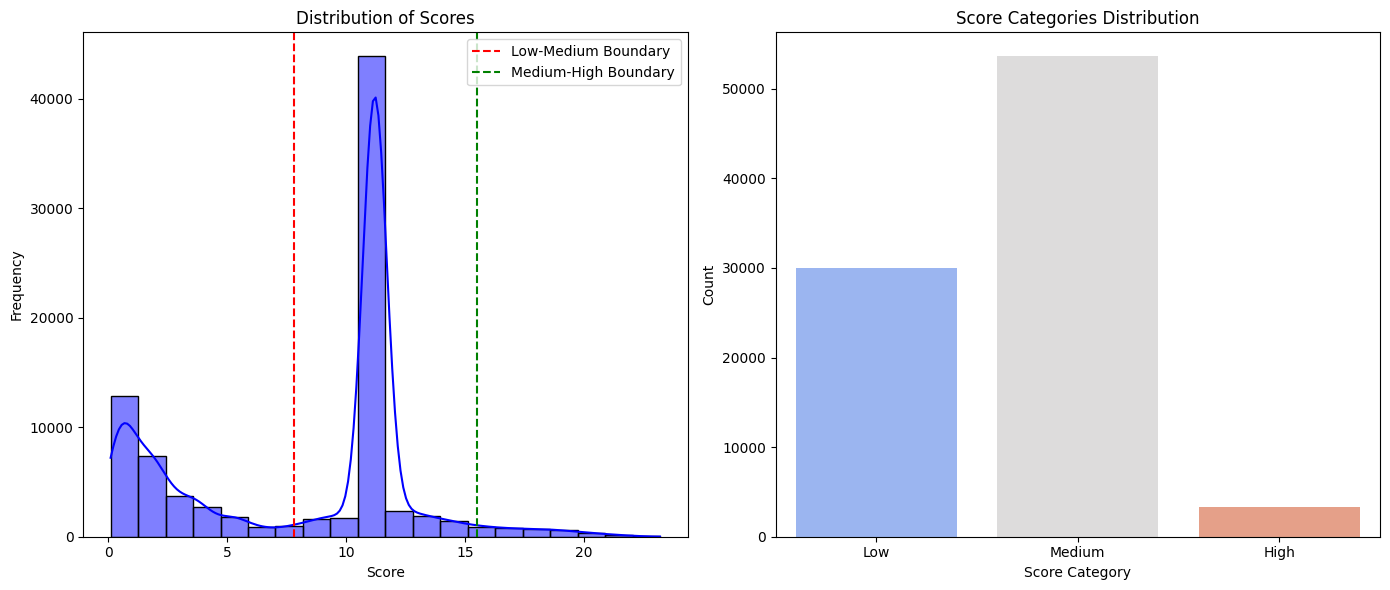

In [27]:
# Visualization: Distribution of Scores and Categories
plt.figure(figsize=(14, 6))

# Histogram of scores with bins
plt.subplot(1, 2, 1)
sns.histplot(data['Score'], bins=20, kde=True, color='blue', edgecolor='black')
plt.axvline(bins[1], color='red', linestyle='--', label='Low-Medium Boundary')
plt.axvline(bins[2], color='green', linestyle='--', label='Medium-High Boundary')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()

# Bar plot for score categories
plt.subplot(1, 2, 2)
score_counts = data['Score_Category'].value_counts().reindex(labels)
sns.barplot(x=score_counts.index, y=score_counts.values, palette='coolwarm')
plt.title('Score Categories Distribution')
plt.xlabel('Score Category')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Here are the visualizations:

# Histogram of Scores:

# Shows the distribution of raw scores.
# Vertical lines indicate the boundaries between Low, Medium, and High categories.
# Bar Plot of Score Categories:


#### Handling Imbalanced Data with SMOTE


In [28]:

try:
    X = data.drop(columns=['Score', 'Score_Category'])
    y = data['Score_Category']
except KeyError as e:
    print("Error in dropping columns:", e)
    print("Available columns:", data.columns)

# Proceed if no errors
if 'Score_Category' in data.columns:
    # Encoding target labels for SMOTE
    le_y = LabelEncoder()
    y = le_y.fit_transform(y)

    # Scaling Features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Splitting into Train and Test Sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Applying SMOTE for Resampling
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    print("SMOTE resampling successful.")
else:
    print("Cannot proceed with SMOTE due to missing 'Score_Category'.")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


SMOTE resampling successful.


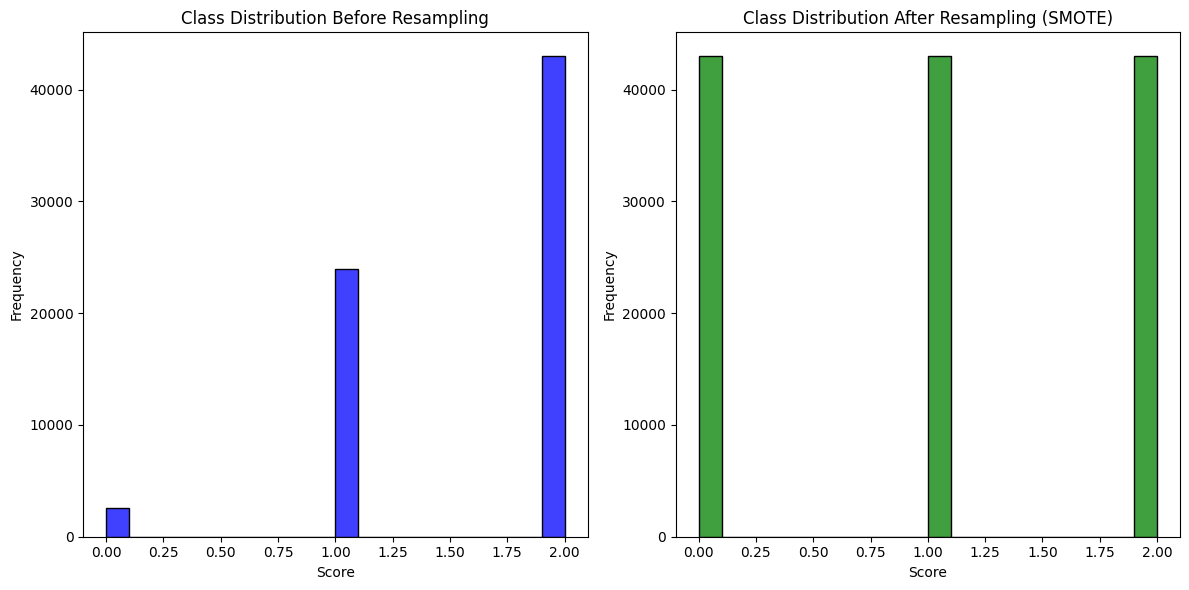

In [29]:
# Visualizing Class Distribution Before and After Resampling
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(y_train, bins=20, kde=False, color='blue')
plt.title('Class Distribution Before Resampling')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(y_resampled, bins=20, kde=False, color='green')
plt.title('Class Distribution After Resampling (SMOTE)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


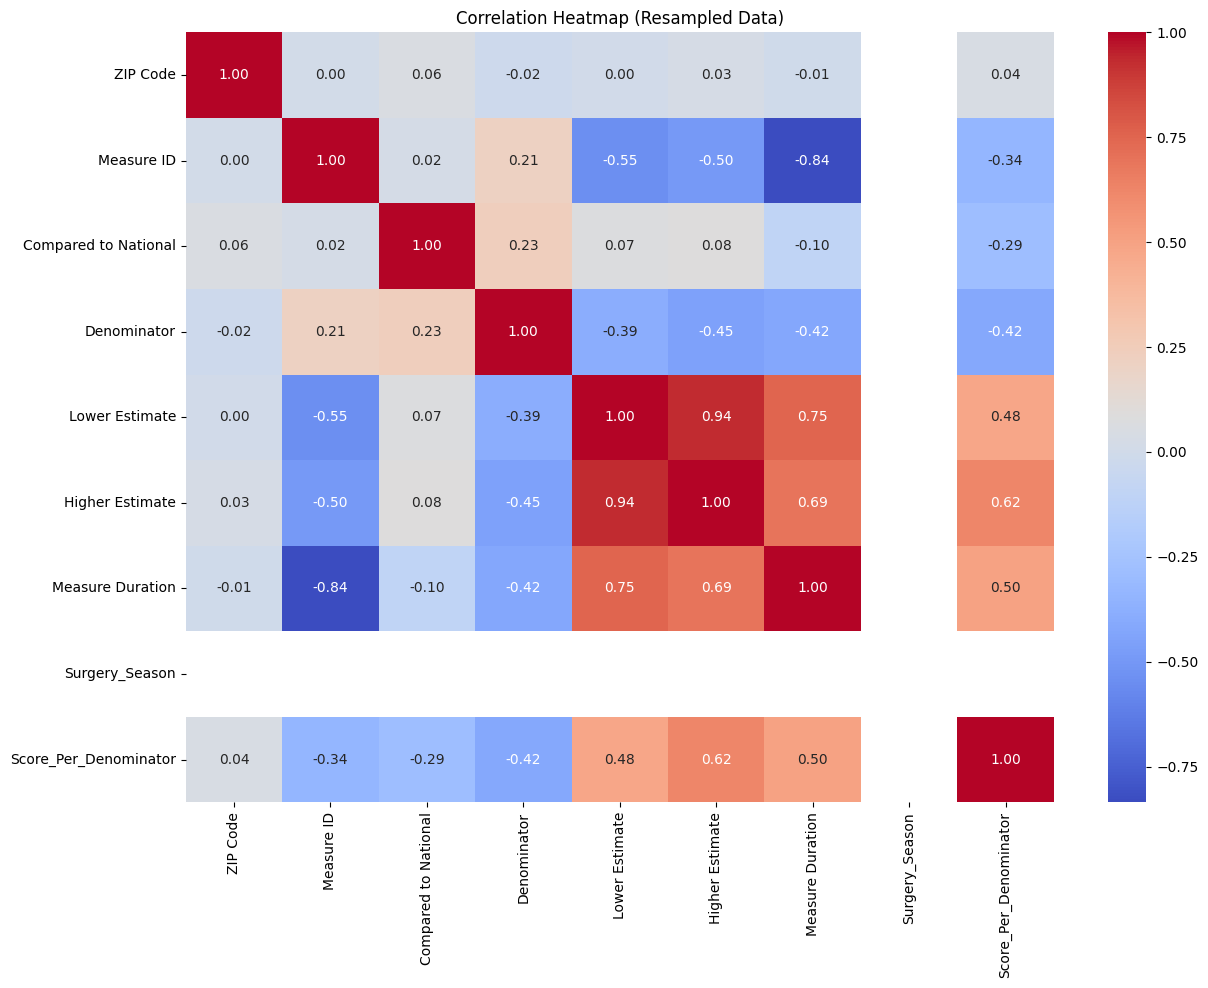

In [30]:
# Correlation Heatmap
correlation_matrix = pd.DataFrame(X_resampled, columns=X.columns).corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Resampled Data)')
plt.show()


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, precision_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

In [33]:
def train_evaluate_model(model, X_train, X_test, y_train, y_test, model_name, le_y):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Precision
    precision = precision_score(y_test, y_pred, average='weighted')

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Convert y_test and y_pred to numeric for MAPE calculation if required
    y_test_numeric = y_test.astype(float)
    y_pred_numeric = y_pred.astype(float)

    print(f"\n{model_name} Performance:")
    print(f"Precision: {precision:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"MAE(Mean absoluate error): {mae:.4f}")
    print(f"MSE(Mean squared error): {mse:.4f}")
    print(f"RMSE(Root mean square error): {rmse:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le_y.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Visualization of Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_y.classes_, yticklabels=le_y.classes_)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # AUC-ROC Curve for Multiclass
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)
        # Convert y_test to a one-vs-all binary format for AUC-ROC calculation
        y_test_binary = label_binarize(y_test, classes=range(len(le_y.classes_)))

        # Calculate ROC-AUC for each class
        auc_scores = {}
        for i, class_name in enumerate(le_y.classes_):
            auc_score = roc_auc_score(y_test_binary[:, i], y_pred_proba[:, i])
            auc_scores[class_name] = auc_score

        print("\nROC-AUC Scores:")
        for class_name, auc_score in auc_scores.items():
            print(f"Class {class_name}: {auc_score:.4f}")

        # Plot the ROC Curve for each class
        plt.figure(figsize=(8, 6))
        for i, class_name in enumerate(le_y.classes_):
            fpr, tpr, _ = roc_curve(y_test_binary[:, i], y_pred_proba[:, i])
            plt.plot(fpr, tpr, label=f"Class {class_name} (AUC: {auc_scores[class_name]:.2f})")

        plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
        plt.title("ROC-AUC Curve")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend(loc="lower right")
        plt.show()
    else:
        print("\nModel does not support probability predictions. ROC-AUC cannot be computed.")


Logistic Regression Performance:
Precision: 0.9961
Accuracy: 0.9959
MAE(Mean absoluate error): 0.0066
MSE(Mean squared error): 0.0117
RMSE(Root mean square error): 0.1081

Classification Report:
              precision    recall  f1-score   support

        High       0.94      1.00      0.97       677
         Low       1.00      1.00      1.00      6062
      Medium       1.00      0.99      1.00     10639

    accuracy                           1.00     17378
   macro avg       0.98      1.00      0.99     17378
weighted avg       1.00      1.00      1.00     17378

Confusion Matrix:
[[  677     0     0]
 [    0  6053     9]
 [   44    18 10577]]


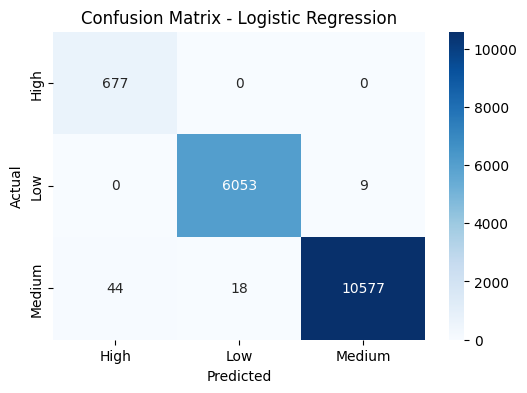


ROC-AUC Scores:
Class High: 1.0000
Class Low: 1.0000
Class Medium: 1.0000


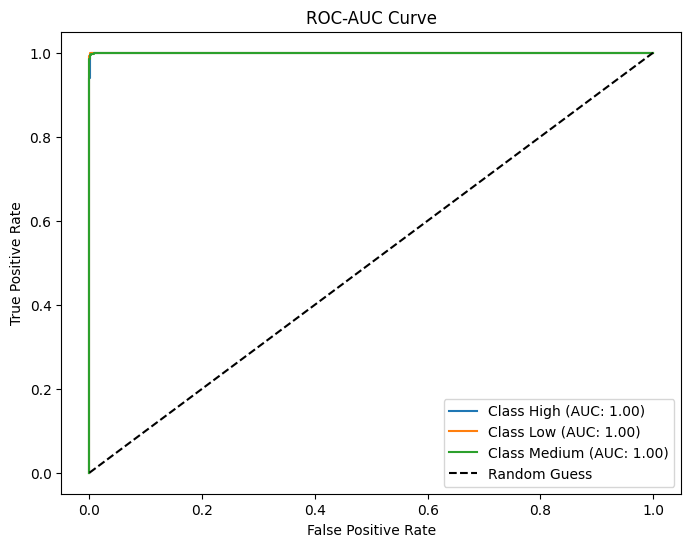

In [34]:
# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
train_evaluate_model(logistic_model, X_resampled, X_test, y_resampled, y_test, "Logistic Regression", le_y)


Random Forest Classifier Performance:
Precision: 0.9976
Accuracy: 0.9976
MAE(Mean absoluate error): 0.0035
MSE(Mean squared error): 0.0058
RMSE(Root mean square error): 0.0762

Classification Report:
              precision    recall  f1-score   support

        High       0.99      0.98      0.99       677
         Low       1.00      1.00      1.00      6062
      Medium       1.00      1.00      1.00     10639

    accuracy                           1.00     17378
   macro avg       0.99      0.99      0.99     17378
weighted avg       1.00      1.00      1.00     17378

Confusion Matrix:
[[  666     0    11]
 [    0  6053     9]
 [    9    12 10618]]


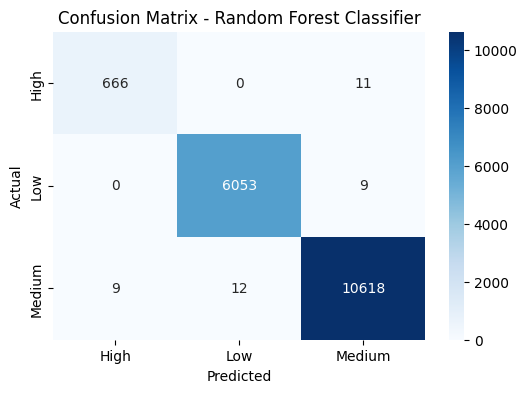


ROC-AUC Scores:
Class High: 1.0000
Class Low: 1.0000
Class Medium: 1.0000


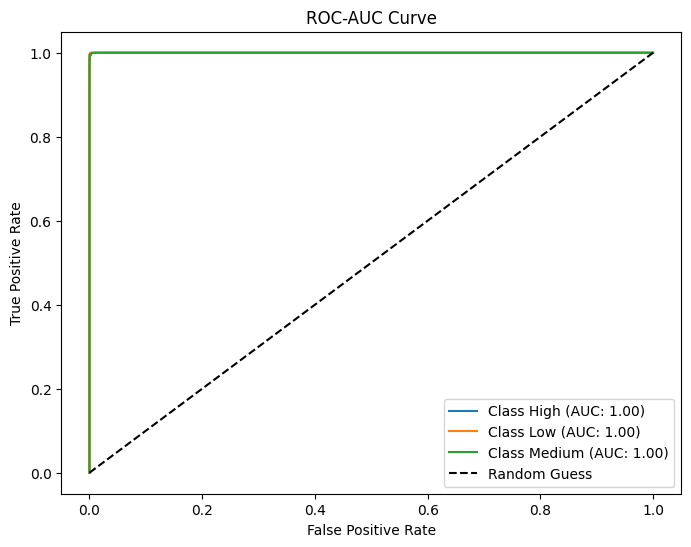

In [35]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
train_evaluate_model(rf_model, X_resampled, X_test, y_resampled, y_test, "Random Forest Classifier",le_y)


Support Vector Machine Performance:
Precision: 0.9951
Accuracy: 0.9949
MAE(Mean absoluate error): 0.0083
MSE(Mean squared error): 0.0148
RMSE(Root mean square error): 0.1216

Classification Report:
              precision    recall  f1-score   support

        High       0.92      1.00      0.96       677
         Low       1.00      1.00      1.00      6062
      Medium       1.00      0.99      1.00     10639

    accuracy                           0.99     17378
   macro avg       0.97      1.00      0.98     17378
weighted avg       1.00      0.99      0.99     17378

Confusion Matrix:
[[  677     0     0]
 [    0  6051    11]
 [   56    22 10561]]


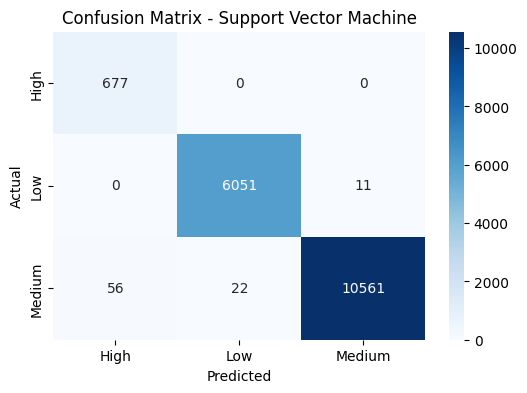


Model does not support probability predictions. ROC-AUC cannot be computed.


In [36]:
# Support Vector Machine
svm_model = SVC(kernel='rbf', random_state=42)
train_evaluate_model(svm_model, X_resampled, X_test, y_resampled, y_test, "Support Vector Machine",le_y)


K-Nearest Neighbors Performance:
Precision: 0.9940
Accuracy: 0.9939
MAE(Mean absoluate error): 0.0096
MSE(Mean squared error): 0.0165
RMSE(Root mean square error): 0.1283

Classification Report:
              precision    recall  f1-score   support

        High       0.93      0.98      0.96       677
         Low       1.00      1.00      1.00      6062
      Medium       1.00      0.99      1.00     10639

    accuracy                           0.99     17378
   macro avg       0.97      0.99      0.98     17378
weighted avg       0.99      0.99      0.99     17378

Confusion Matrix:
[[  666     0    11]
 [    0  6045    17]
 [   49    29 10561]]


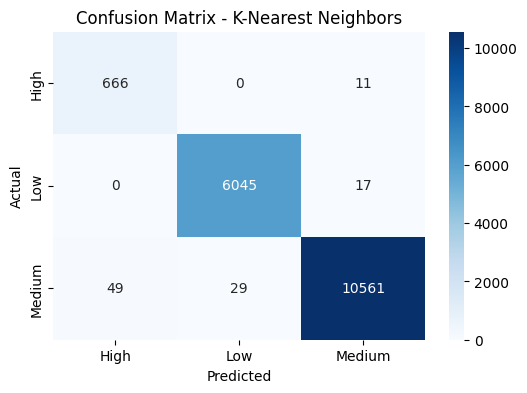


ROC-AUC Scores:
Class High: 0.9965
Class Low: 0.9994
Class Medium: 0.9983


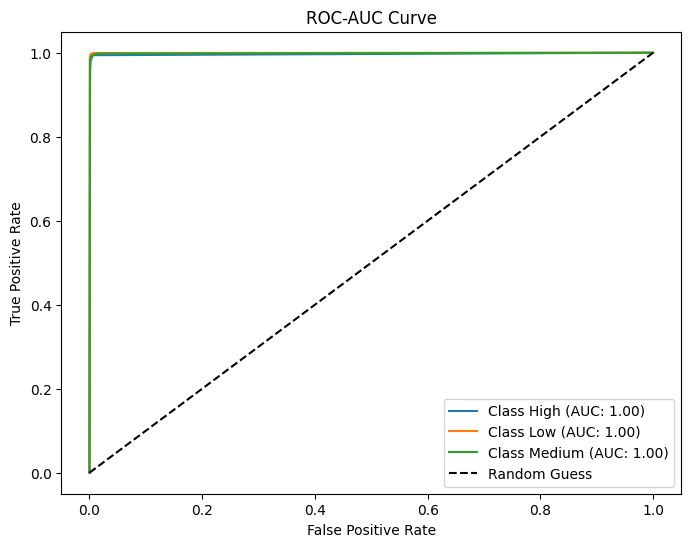

In [37]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
train_evaluate_model(knn_model, X_resampled, X_test, y_resampled, y_test, "K-Nearest Neighbors",le_y)